<img src='1200x630wa.png' style="max-width: 100%"></img>

In [451]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


> <h1 style="color: #F48668">Import Data</h1>

In [452]:
df = pd.read_csv(r'D:\Data\uber\My Uber Drives - 2016.csv')

In [453]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,1/6/2016 17:15,1/6/2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,1/6/2016 17:30,1/6/2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,1/7/2016 13:27,1/7/2016 13:33,Business,Cary,Cary,0.8,Meeting
8,1/10/2016 8:05,1/10/2016 8:25,Business,Cary,Morrisville,8.3,Meeting
9,1/10/2016 12:17,1/10/2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [454]:
df.rename(columns=lambda s:s[:-1] , inplace=True)

In [455]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB



> <h1 style="color: #F48668">work with date and get more features</h1>

In [457]:
# convert start and end dates to date time
df[df['START_DATE']=='Totals'] = np.nan
df['START_DATE'].dropna(inplace=True)
df['START_DATE'] = pd.to_datetime(df['START_DATE'],format = "%m/%d/%Y %H:%M",errors='ignore')
df['END_DATE'] = pd.to_datetime(df['END_DATE'],format = "%m/%d/%Y %H:%M",errors='ignore')

In [458]:
# get day name from date
df['DAY'] = df['START_DATE'].dt.weekday
days = {0:'monday' ,1:'tusday',2:'wednesday',3:'thursday',4:'firday',5:'saturday',6:'sunday' }
df['DAY'] = df['DAY'].map(days)

In [459]:
# get hours from date
df['hour']=df['START_DATE'].dt.hour

In [460]:
def day_parts(hour):
    if hour >= 5 and hour < 12 :
        return 'Morning'
    elif hour >=12 and hour < 17 :
        return 'Afternoon'
    elif hour >= 17 and hour < 21 :
        return 'Evening '
    else:
        return 'Night'

# make day parts from hour column
df['DAY_PART'] = df['hour'].apply(day_parts)
del df['hour']

In [461]:
# get trip time in minutes
df['TRIP_TIME']= df['END_DATE']-df['START_DATE']
df['TRIP_TIME'] = df['TRIP_TIME'] / np.timedelta64(1,'m')
del df['END_DATE']
del df['START_DATE']

In [462]:
# make speed column from miles and time
time = (df['TRIP_TIME']/60)
df['SPEED'] = df['MILES']/ time




> <h1 style="color: #F48668">solve some issues in speed column</h1>

In [463]:
idx = df.index[df['START']=='Unknown Location'].tolist()
df.iloc[idx]['START'] = df.iloc[idx]['STOP']

In [464]:
df[df['SPEED']==np.inf] = 0 

In [465]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DAY_PART,TRIP_TIME,SPEED
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,firday,Night,6.0,51.000000
1,Business,Fort Pierce,Fort Pierce,5.0,NaN,saturday,Night,12.0,25.000000
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,saturday,Evening,13.0,22.153846
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,tusday,Evening,14.0,20.142857
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,wednesday,Afternoon,67.0,57.044776


In [466]:
df[df['START'] =='Unknown Location'] = np.nan
df[df['STOP'] =='Unknown Location'] = np.nan

df[df['CATEGORY']==0]=np.nan
df.dropna(inplace=True)

-------------------------------------------------------------------------------------

In [467]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DAY_PART,TRIP_TIME,SPEED
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,firday,Night,6.0,51.000000
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,saturday,Evening,13.0,22.153846
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,tusday,Evening,14.0,20.142857
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,wednesday,Afternoon,67.0,57.044776
5,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,wednesday,Evening,4.0,64.500000


In [468]:
df.describe()

,MILES,TRIP_TIME,SPEED
count,572.000000,572.000000,572.000000
mean,11.238112,22.493007,25.259671
std,24.103358,25.781344,15.847141
min,0.500000,2.000000,6.000000
25%,3.100000,11.000000,16.800000
50%,6.150000,17.000000,22.500000
75%,10.400000,25.000000,29.456250
max,310.300000,330.000000,228.000000


In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CATEGORY   572 non-null    object 
 1   START      572 non-null    object 
 2   STOP       572 non-null    object 
 3   MILES      572 non-null    float64
 4   PURPOSE    572 non-null    object 
 5   DAY        572 non-null    object 
 6   DAY_PART   572 non-null    object 
 7   TRIP_TIME  572 non-null    float64
 8   SPEED      572 non-null    float64
dtypes: float64(3), object(6)
memory usage: 44.7+ KB



> <h1 style="color: #F48668">EDA</h1>

In [470]:
# Utility Functions
palette_color = sns.color_palette('rocket_r')
def doughnuts(data , palette_color):
    # Create a pieplot
    plt.pie(x= data.values , labels=data.index , autopct='%.2f%%',shadow=True , startangle=90 , colors=palette_color)
    plt.axis('equal')
    # plt.legend(loc='upper right')
    # add a circle at the center to transform it in a donut chart
    my_circle=plt.Circle( (0,0), 0.7, color='white')
    p=plt.gcf()
    p.gca().add_artist(my_circle)

    return p

In [471]:
df.head()

,CATEGORY,START,STOP,MILES,PURPOSE,DAY,DAY_PART,TRIP_TIME,SPEED
0,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,firday,Night,6.0,51.000000
2,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,saturday,Evening,13.0,22.153846
3,Business,Fort Pierce,Fort Pierce,4.7,Meeting,tusday,Evening,14.0,20.142857
4,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,wednesday,Afternoon,67.0,57.044776
5,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,wednesday,Evening,4.0,64.500000


> <h4 style="color: #F48668"> CATEGORY</h4>

In [472]:
df['CATEGORY'].value_counts()

Business    566
Personal      6
Name: CATEGORY, dtype: int64

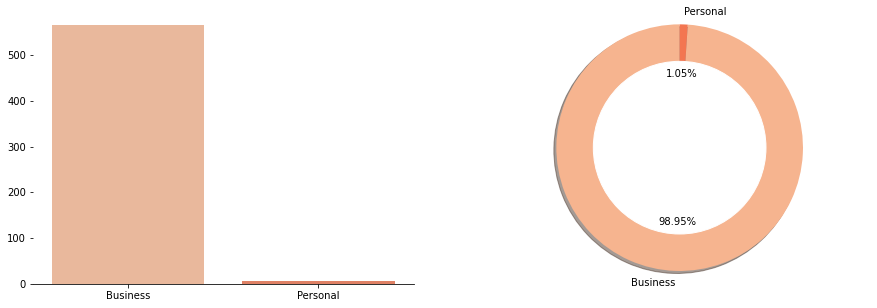

In [473]:
category_val = df['CATEGORY'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.barplot(x=category_val.index , y=category_val.values , palette=palette_color,ax=ax[0])
sns.despine(left=True)
ax[1]=doughnuts(category_val,palette_color)
plt.show()



> <h4 style="color: #F48668"> START</h4>

In [474]:
df['START'].value_counts()

Cary                 160
Morrisville           54
Whitebridge           36
Durham                30
Raleigh               21
                    ... 
Washington Avenue      1
Sugar Land             1
Katy                   1
Austin                 1
Gampaha                1
Name: START, Length: 128, dtype: int64

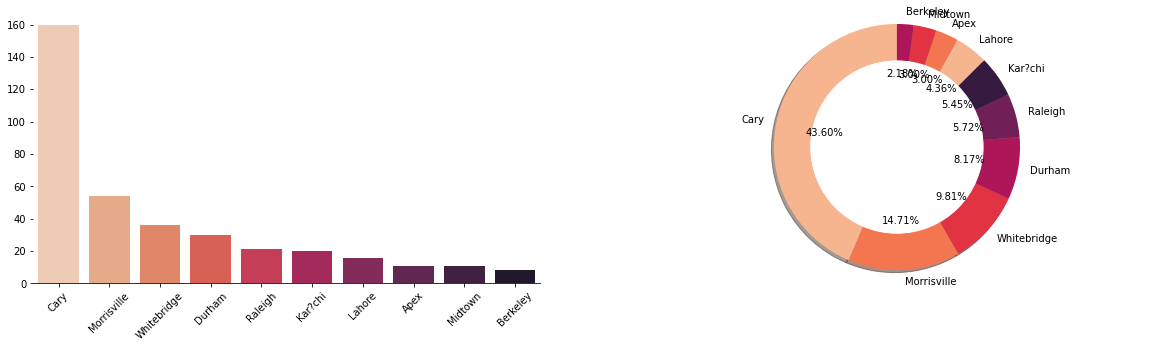

In [475]:
start_val = df['START'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=start_val.index ,y=start_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
# plt.title('top 10 start points')
ax[1]=doughnuts(start_val,palette_color)

plt.show()


> <h4 style="color: #F48668"> STOP</h4>

In [476]:
stop_val = df['STOP'].value_counts().head(10)
stop_val

Cary           155
Morrisville     59
Whitebridge     37
Durham          30
Raleigh         21
Kar?chi         20
Lahore          16
Apex            11
Berkeley        11
Midtown         10
Name: STOP, dtype: int64

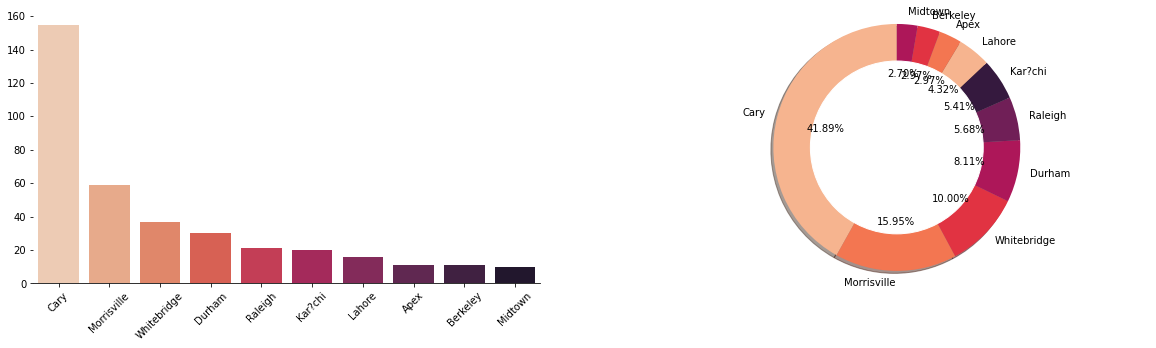

In [477]:
stop_val = df['STOP'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=stop_val.index ,y=stop_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(stop_val,palette_color)



> <h4 style="color: #F48668"> MILES</h4>

In [478]:
df['MILES'].value_counts()

9.9      26
3.1      20
10.4     16
6.1      13
3.0      12
         ..
201.0     1
310.3     1
23.0      1
57.0      1
48.2      1
Name: MILES, Length: 191, dtype: int64

In [479]:
m = {}


for i in df['MILES']:
    if i < 10:
        m.setdefault(i,'0-10 miles')
    elif i >= 10 and i < 20:
        m.setdefault(i,'10-20 miles')
    elif i >= 20 and i < 30:
        m.setdefault(i,'20-30 miles')
    elif i >= 30 and i < 40:
        m.setdefault(i,'30-40 miles')
    elif i >= 40 and i < 50:
        m.setdefault(i,'40-50 miles')
    else:
        m.setdefault(i,'Above 50 miles')
df['MILES'] = df['MILES'].map(m)

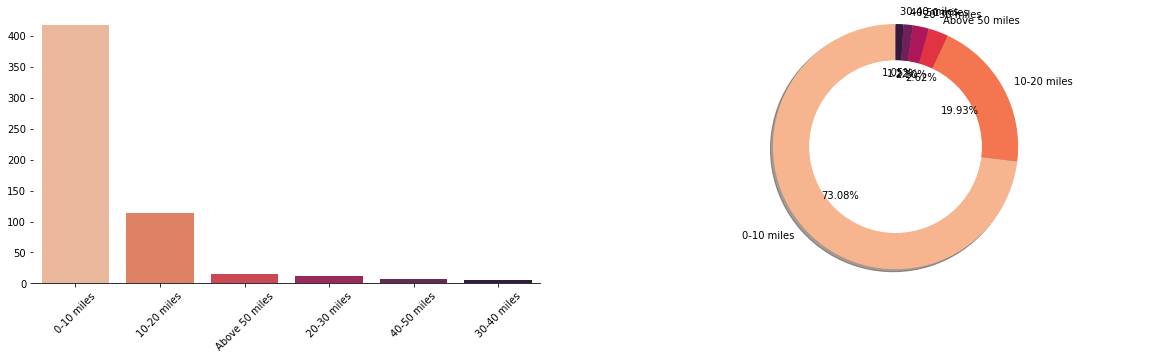

In [480]:
miles_val = df['MILES'].value_counts().sort_values(ascending=False)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=miles_val.index ,y=miles_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(miles_val,palette_color)


> <h4 style="color: #F48668"> PURPOSE</h4>

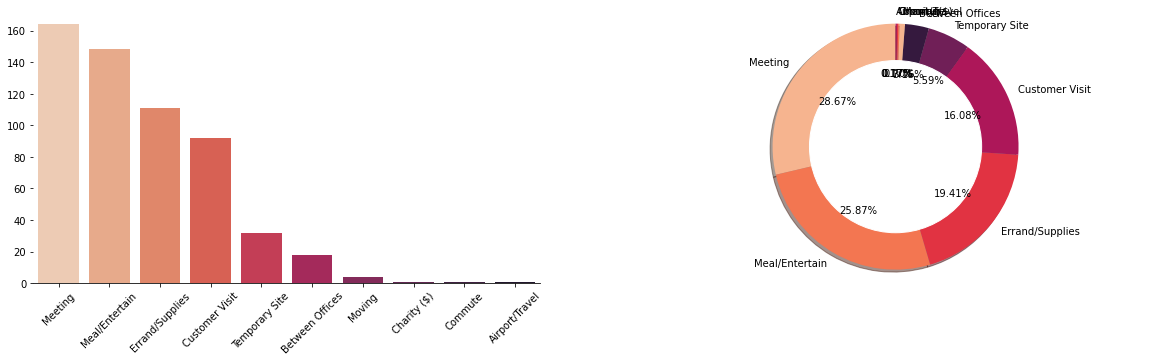

In [481]:
purpose_val = df['PURPOSE'].value_counts().head(10)
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=purpose_val.index ,y=purpose_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(purpose_val,palette_color)


> <h4 style="color: #F48668"> WEEK DAYS</h4>

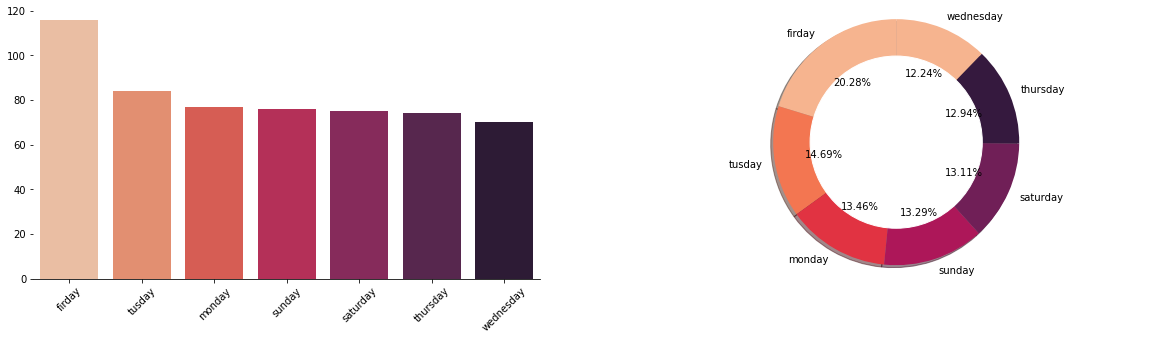

In [482]:
day_val = df['DAY'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=day_val.index ,y=day_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(day_val,palette_color)

> <h4 style="color: #F48668"> DAY PARTS</h4>

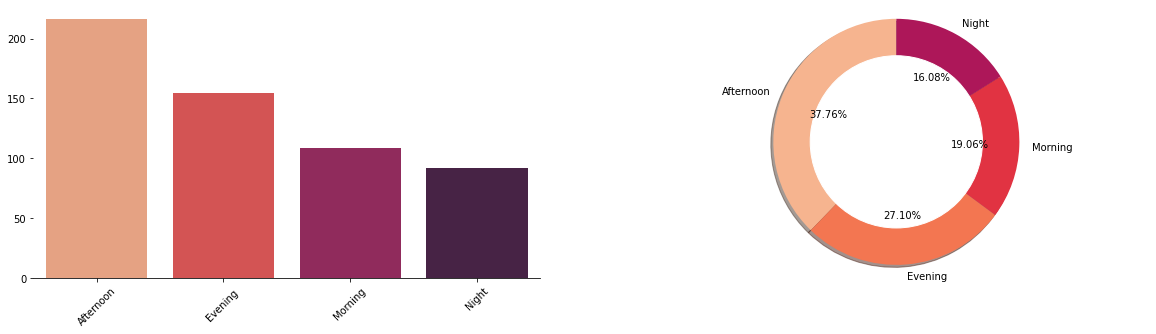

In [483]:
day_part_val = df['DAY_PART'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=day_part_val.index ,y=day_part_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(day_part_val,palette_color)


> <h4 style="color: #F48668"> TRIP TIME</h4>

In [484]:
df['TRIP_TIME'].describe()

count    572.000000
mean      22.493007
std       25.781344
min        2.000000
25%       11.000000
50%       17.000000
75%       25.000000
max      330.000000
Name: TRIP_TIME, dtype: float64

In [485]:
m = {}


for i in df['TRIP_TIME']:
    if i < 20:
        m.setdefault(i,'0-20 minutes')
    elif i >= 20 and i < 100:
        m.setdefault(i,'20-100 minutes')
    elif i >= 100 and i < 200:
        m.setdefault(i,'100-200 minutes')
    elif i >= 200 and i < 400:
        m.setdefault(i,'more than 200 minutes')

df['TRIP_TIME_bin'] = df['TRIP_TIME'].map(m)

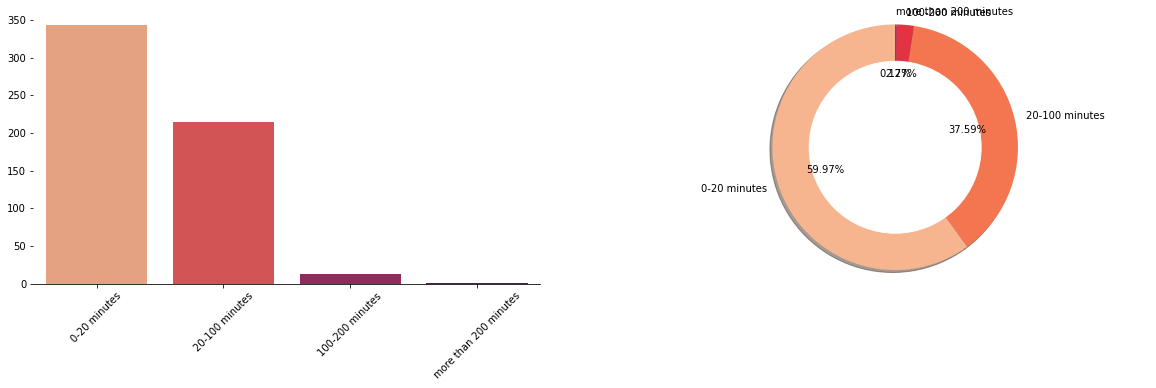

In [486]:

TRIP_TIME_bin_val = df['TRIP_TIME_bin'].value_counts()
fig,ax = plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=TRIP_TIME_bin_val.index ,y=TRIP_TIME_bin_val.values , palette='rocket_r',ax=ax[0])
ax[0].tick_params(axis='x' , rotation = 45)
sns.despine(left=True)
ax[1]=doughnuts(TRIP_TIME_bin_val,palette_color)


> <h4 style="color: #F48668"> SPEED</h4>

<AxesSubplot:xlabel='SPEED', ylabel='Density'>

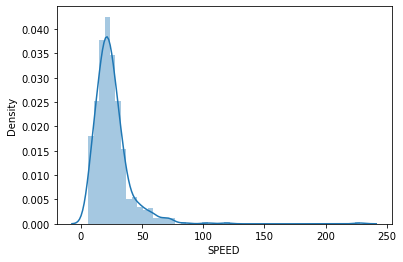

In [487]:
sns.distplot(df['SPEED'])

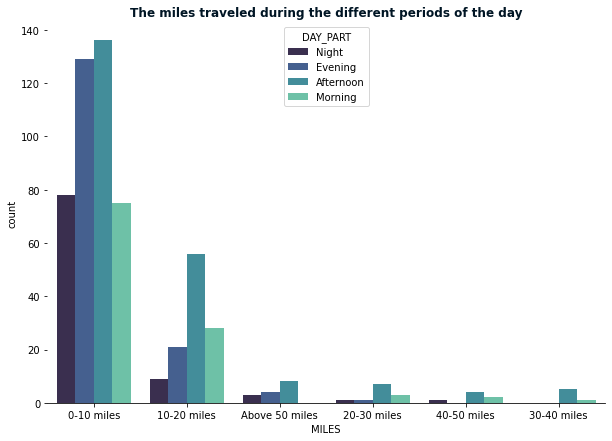

In [500]:
plt.figure(figsize=(10,7))
sns.countplot(df['MILES'], hue=df['DAY_PART'], palette='mako',order = df['MILES'].value_counts().index)
sns.despine(left=True)
plt.title('The miles traveled during the different periods of the day',fontweight="bold" , color='#001524')
plt.show()

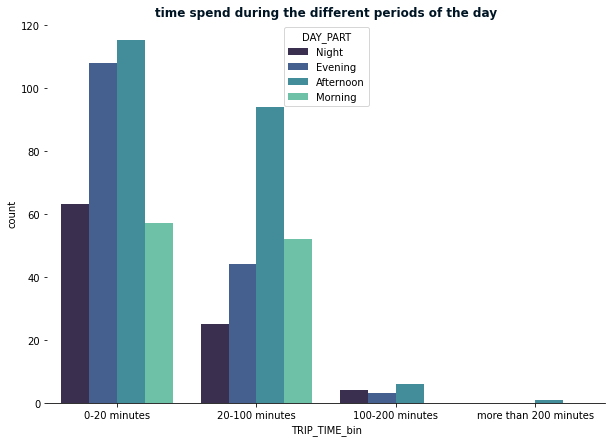

In [507]:
plt.figure(figsize=(10,7))
sns.countplot(df['TRIP_TIME_bin'], hue=df['DAY_PART'], palette='mako',order = df['TRIP_TIME_bin'].value_counts().index)
sns.despine(left=True)
plt.title('time spend during the different periods of the day',fontweight="bold" , color='#001524')
plt.show()

__Observations__
- there are 128 diffrent start point
- cary and morrisiville are the most start and end points 
- most trips take range from  0 to 10 miles
- popular purposes for trips are Meetings , Meals, Entertain and Errand  
- fridaay , tusday and monday are the most days have trips
- afternoon the highest time of the day has trips
- Ride durations range from 2 minutes to 330 minutes
- evening the most time have short time trips